# Mapping Air Quality with API
How do we can gather air pollution data for a particular location, using an *Application Programming Interface*.

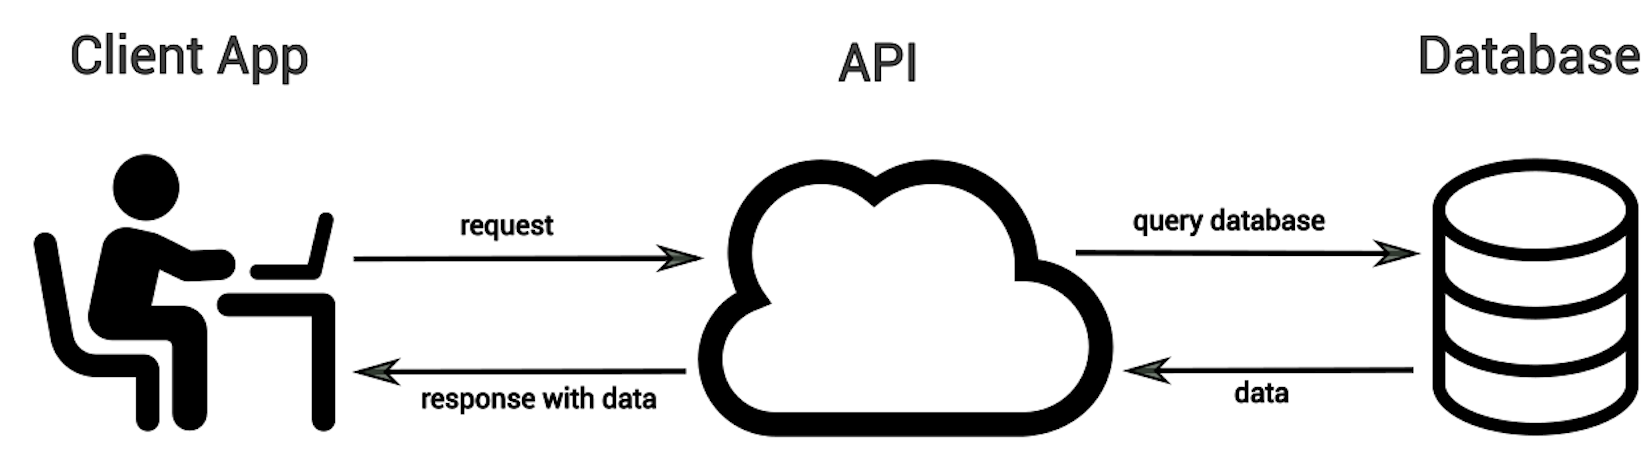

An API allows a user to request specific data (e.g. on air pollution, routes...) to a server that contains that information. If the authentification is approved, the server will return data to the user through the API. That data is often returned in an XML or JSON format.

## Increased interest in environmental health and modeling exposure to contaminants found in water, food or the air we breathe.

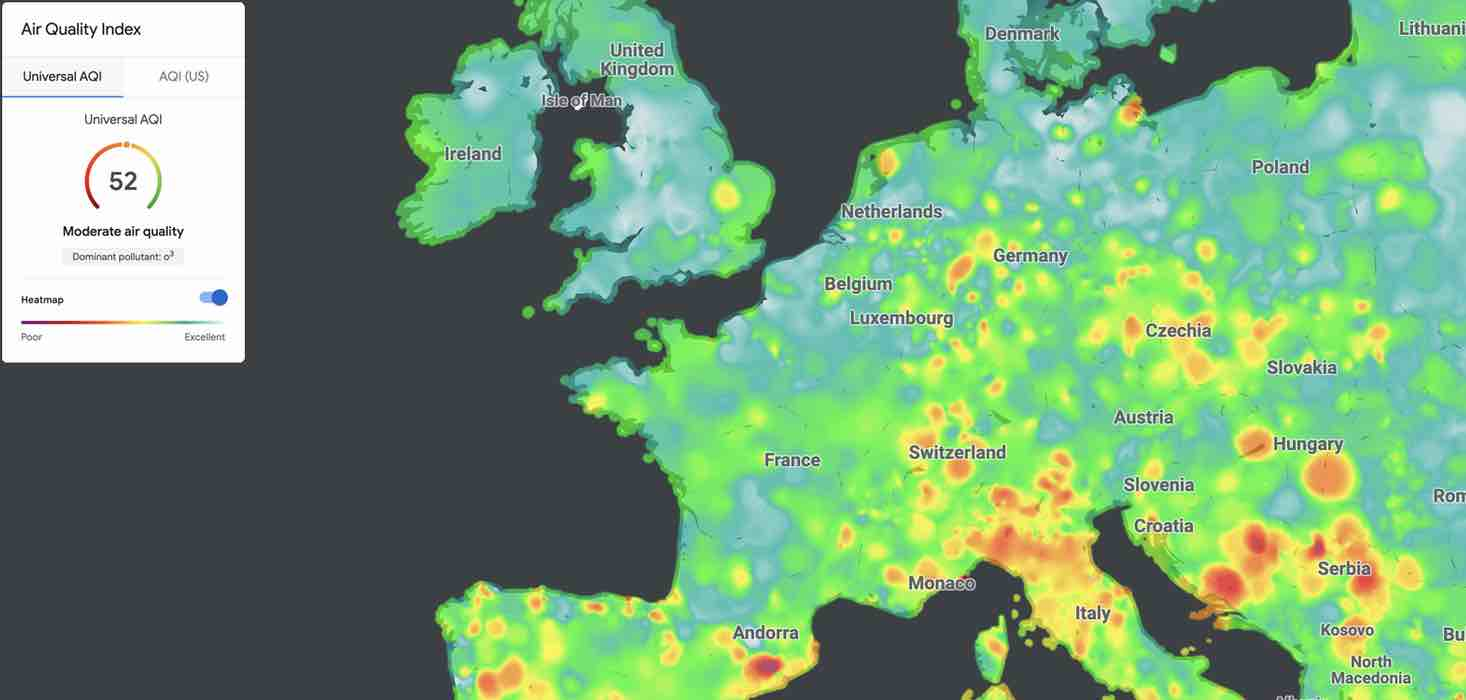

# **`airpyllution`**

First we import the package we may need, in our case `airpyllution`, and mapping libraries.

In [3]:
# Import package
#! pip install airpyllution

#To use the package, import the package with the following commands:
from airpyllution.airpyllution import get_air_pollution
from airpyllution.airpyllution import get_pollution_history
from airpyllution.airpyllution import get_pollution_forecast

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import altair as alt

### Retrieve historic pollution data with specified date range and location:

Here we extract the pollution (using **get_pollution_history**) for the city of Philadelphia for a particular time range. Note that the time are expressed as unix times.

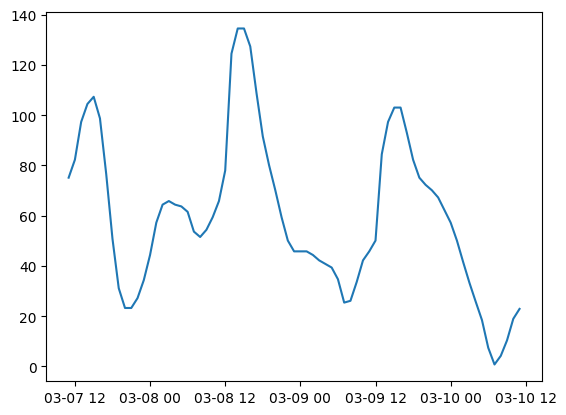

In [4]:
df = get_pollution_history(1741342045, 1741604845, 50.8477, 4.3572, '635948b768a2268ceccb06606c403863')

#unix time stamps: https://www.unixtimestamp.com/

#Converting date/time strings to datetime objects
df['Date'] = pd.to_datetime(df['dt'])

#Setting a datetime column as a dataframe index
df = df.set_index('Date')

#Spagetthi plot - https://www.datacamp.com/tutorial/matplotlib-time-series-line-plot
plt.plot(df.index, df['o3'])

### Improve the figure a bit...

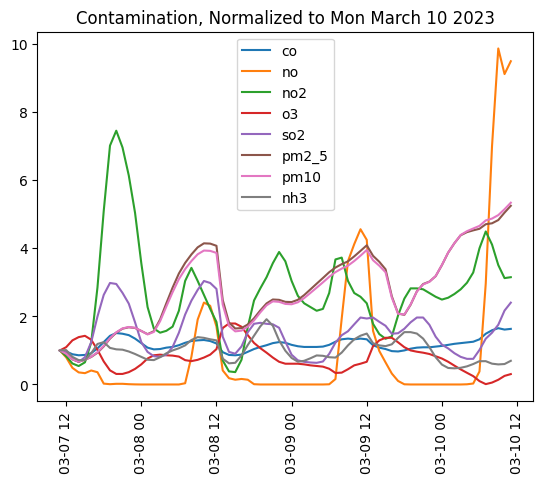

In [5]:
# Create the figure and axes
fig, ax = plt.subplots()

# Iterate over the data columns
listCol = df.columns

for contaminant in listCol[0:-1]:
    x = df.index
    y = df[contaminant]

    # Trime
#    ax.plot(x, y, label=contaminant)
    ax.plot(x, y / y.iloc[0], label=contaminant)

# Format and add a legend
ax.set_title("Contamination, Normalized to Mon March 10 2023")
#ax.set_xticks(["min(df['dt'])", "max(df['dt'])"])
ax.tick_params(axis='x', labelrotation=90)
ax.legend(fontsize=10);

## Get pollution forecast for the next 5 days.

In [6]:
import altair as alt
alt.renderers.enable("html");

get_pollution_forecast(50.8477, 4.3572, '635948b768a2268ceccb06606c403863')

alt.FacetChart(...)

# `OpenWeatherMap`

Here we pass a request to `openweathermap` to get the pollution at this particular moment at a particular place (as set in lat and long).

In [8]:
from urllib.request import urlopen
import json
import datetime


url_request = "http://api.openweathermap.org/data/2.5/air_pollution?lat=50.8477&lon=4.3572&appid=635948b768a2268ceccb06606c403863"
url_sourceCode = urlopen(url_request).read()
response = json.loads(url_sourceCode)
X = response.get("list")[0]
contaminants = X.get("components")
time = X.get("dt")
exactTime = datetime.datetime.fromtimestamp(time)

print("Pollution in Brussels at " + str(exactTime) + " !! GMT -2")
for key in contaminants:
    print(key, "->", contaminants[key])


Pollution in Brussels at 2025-03-10 12:19:02 !! GMT -2
co -> 534.06
no -> 33.98
no2 -> 39.41
o3 -> 22.89
so2 -> 4.95
pm2_5 -> 73
pm10 -> 81.72
nh3 -> 8.36


# Getting pollution information every so often
sleep time = 20sec

In [9]:
from urllib.request import urlopen
import json
import datetime
import time

i=0
while i <10:
  url_request="http://api.openweathermap.org/data/2.5/air_pollution?lat=50.850346&lon=4.351721&appid=635948b768a2268ceccb06606c403863"
  url_sourceCode = urlopen(url_request).read()
  response = json.loads(url_sourceCode)
  X = response.get("list")[0]
  contaminants = X.get("components")
  timeTime = X.get("dt")
  exactTime = datetime.datetime.fromtimestamp(timeTime)

  print("Pollution in Brussels at " + str(exactTime) + " !! GMT -2")
  for key in contaminants:
    print(key, "->", contaminants[key])

  time.sleep(20)
  i+=1

Pollution in Brussels at 2025-03-10 12:29:02 !! GMT -2
co -> 534.06
no -> 33.98
no2 -> 39.41
o3 -> 22.89
so2 -> 4.95
pm2_5 -> 73
pm10 -> 81.72
nh3 -> 8.36
Pollution in Brussels at 2025-03-10 12:29:02 !! GMT -2
co -> 534.06
no -> 33.98
no2 -> 39.41
o3 -> 22.89
so2 -> 4.95
pm2_5 -> 73
pm10 -> 81.72
nh3 -> 8.36
Pollution in Brussels at 2025-03-10 12:29:02 !! GMT -2
co -> 534.06
no -> 33.98
no2 -> 39.41
o3 -> 22.89
so2 -> 4.95
pm2_5 -> 73
pm10 -> 81.72
nh3 -> 8.36
Pollution in Brussels at 2025-03-10 12:29:02 !! GMT -2
co -> 534.06
no -> 33.98
no2 -> 39.41
o3 -> 22.89
so2 -> 4.95
pm2_5 -> 73
pm10 -> 81.72
nh3 -> 8.36
Pollution in Brussels at 2025-03-10 12:29:02 !! GMT -2
co -> 534.06
no -> 33.98
no2 -> 39.41
o3 -> 22.89
so2 -> 4.95
pm2_5 -> 73
pm10 -> 81.72
nh3 -> 8.36
Pollution in Brussels at 2025-03-10 12:29:02 !! GMT -2
co -> 534.06
no -> 33.98
no2 -> 39.41
o3 -> 22.89
so2 -> 4.95
pm2_5 -> 73
pm10 -> 81.72
nh3 -> 8.36
Pollution in Brussels at 2025-03-10 12:29:02 !! GMT -2
co -> 534.06
no

# Getting pollution data for Belgium on a predefined grid

## Import necessary libraries

In [10]:
import geopandas as gpd
import altair as alt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from shapely.geometry import Point, Polygon
import os
import glob
from urllib.request import urlopen
import json
import datetime
import time
%matplotlib inline


#data = !wget "https://stacks.stanford.edu/file/druid:hs337qd4914/data.zip"
#print(data)
#!unzip data
country = gpd.read_file("data/BEL_ADM0.shp")
country.head()
country['geometry'].iloc[0]

#get extent boundaries
minX = country.bounds['minx']
minY = country.bounds['miny']
maxY = country.bounds['maxy']
maxX = country.bounds['maxx']

#how dense> Higher number = more points
spacing = 0.1
#create a grid around country

xmin, ymin, xmax, ymax = country.total_bounds


xcoords = [c for c in np.arange(xmin, xmax, spacing)] #Create x coordinates
ycoords = [c for c in np.arange(ymin, ymax, spacing)] #And y

coordinate_pairs = np.array(np.meshgrid(xcoords, ycoords)).T.reshape(-1, 2) #Create all combinations of xy coordinates
geometries = gpd.points_from_xy(coordinate_pairs[:,0], coordinate_pairs[:,1]) #Create a list of shapely points

pointdf = gpd.GeoDataFrame(geometry=geometries, crs=country.crs) #Create the point df
pointdf.to_file('polygongrid.shp')

insidePts = pointdf.clip(country)
insidePts['x'] = insidePts.geometry.x
insidePts['y'] = insidePts.geometry.y
#creating empty series
insidePts['co']=np.ones(len(insidePts))*0
insidePts['no']=np.ones(len(insidePts))*0
insidePts['no2']=np.ones(len(insidePts))*0
insidePts['o3']=np.ones(len(insidePts))*0
insidePts['so2']=np.ones(len(insidePts))*0
insidePts['pm2_5']=np.ones(len(insidePts))*0
insidePts['pm10']=np.ones(len(insidePts))*0
insidePts['nh3']=np.ones(len(insidePts))*0
insidePts['time']=np.ones(len(insidePts))*0

i=0
while i <len(insidePts):
  lat = list(insidePts.geometry)[i].y
  long = list(insidePts.geometry)[i].x
  url_request="http://api.openweathermap.org/data/2.5/air_pollution?lat="+str(lat)+"&lon="+str(long)+"&appid=635948b768a2268ceccb06606c403863"
  url_sourceCode = urlopen(url_request).read()
  response = json.loads(url_sourceCode)
  X = response.get("list")[0]
  contaminants = X.get("components")
  #print(X)
  #print(contaminants)
  #timeTime = X.get("dt")
  #insidePts['time'][i] = datetime.datetime.fromtimestamp(timeTime)
  for key in contaminants:
    insidePts[key].iloc[i] = contaminants[key]
  print("left to calculate..." + str(len(insidePts)-i))
  i=i+1

insidePts.head()

/Users/delmelle/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/delmelle/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/delmelle/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


left to calculate...388
left to calculate...387
left to calculate...386
left to calculate...385
left to calculate...384
left to calculate...383
left to calculate...382
left to calculate...381
left to calculate...380
left to calculate...379
left to calculate...378
left to calculate...377
left to calculate...376
left to calculate...375
left to calculate...374
left to calculate...373
left to calculate...372
left to calculate...371
left to calculate...370
left to calculate...369
left to calculate...368
left to calculate...367
left to calculate...366
left to calculate...365
left to calculate...364
left to calculate...363
left to calculate...362
left to calculate...361
left to calculate...360
left to calculate...359
left to calculate...358
left to calculate...357
left to calculate...356
left to calculate...355
left to calculate...354
left to calculate...353
left to calculate...352
left to calculate...351
left to calculate...350
left to calculate...349
left to calculate...348
left to calculat

,geometry,x,y,co,no,no2,o3,so2,pm2_5,pm10,nh3,time
569,POINT (5.24543 49.69697),5.245427,49.696968,290.39,0.37,4.37,65.09,0.23,25.43,26.16,5.57,0.0
652,POINT (5.64543 49.59697),5.645427,49.596968,270.37,0.24,2.83,80.82,0.63,5.35,5.86,4.43,0.0
610,POINT (5.44543 49.59697),5.445427,49.596968,267.03,0.24,2.91,74.39,0.11,6.64,7.11,4.62,0.0
631,POINT (5.54543 49.59697),5.545427,49.596968,267.03,0.24,2.91,74.39,0.11,6.64,7.11,4.62,0.0
653,POINT (5.64543 49.69697),5.645427,49.696968,283.72,0.33,4.93,67.95,0.31,23.71,24.67,6.59,0.0


## Now we will plot the results for Ozone (o3) using matplotlib.

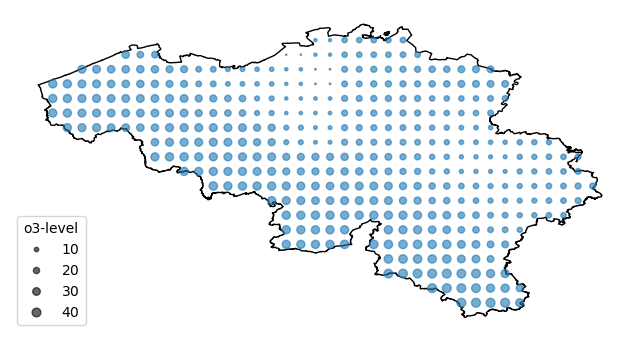

In [16]:
import math
## Plot
fig, ax = plt.subplots(figsize=(8, 8))
country.plot(ax=ax, facecolor="none", edgecolor="black")
ax.set_axis_off()
ax.set_aspect("equal")
scatter = ax.scatter(insidePts['x'], insidePts['y'], (insidePts['o3']-min(insidePts['o3']))+1, alpha=0.6)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=4)
legend2 = ax.legend(handles, labels, loc="lower left", ncol = 1, title="o3-level")



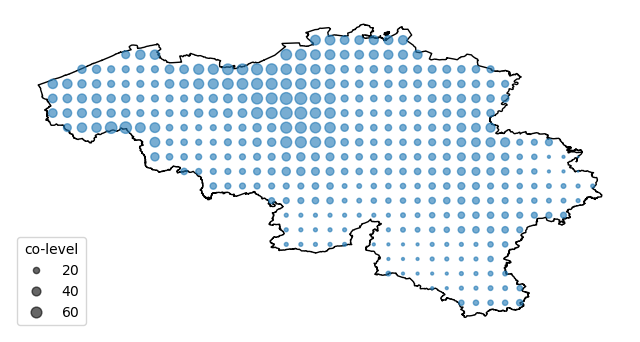

In [25]:
import math
## Plot
fig, ax = plt.subplots(figsize=(8, 8))
country.plot(ax=ax, facecolor="none", edgecolor="black")
ax.set_axis_off()
ax.set_aspect("equal")
scatter = ax.scatter(insidePts['x'], insidePts['y'], (insidePts['co']-min(insidePts['co']))+1, alpha=0.6)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=4)
legend2 = ax.legend(handles, labels, loc="lower left", ncol = 1, title="co-level")

In [ ]:
import math
## Plot
fig, ax = plt.subplots(figsize=(8, 8))
country.plot(ax=ax, facecolor="none", edgecolor="black")
ax.set_axis_off()
ax.set_aspect("equal")
scatter = ax.scatter(insidePts['x'], insidePts['y'], (insidePts['pm2_5']-min(insidePts['pm2_5']))+1, alpha=0.6)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=4)
legend2 = ax.legend(handles, labels, loc="lower left", ncol = 1, title="pm2_5-level")

## Interactive map based on GeoPandas and folium/leaflet.js

In [17]:
!pip install mapclassify
import mapclassify
import math
mino3 = min(insidePts["o3"])

print(mino3)
insidePts.explore(
    style_kwds={"style_function": lambda x: {"radius": math.sqrt(math.sqrt(x["properties"]["o3"]-min(insidePts["o3"])))},
                "weight": .4},
)

20.56
